In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import collections
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [99]:
#read data
file_path = r'C:\Users\zsakr\OneDrive\Documents\ELVTR\Capstone\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv'
df = pd.read_csv(file_path)

In [100]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [101]:
print(df['loan_status'])

0            Current
1            Current
2         Fully Paid
3            Current
4         Fully Paid
            ...     
99995     Fully Paid
99996     Fully Paid
99997    Charged Off
99998        Current
99999    Charged Off
Name: loan_status, Length: 100000, dtype: object


In [102]:
print(df['loan_status'].unique())

['Current' 'Fully Paid' 'Charged Off' 'Issued' 'Late (31-120 days)'
 'In Grace Period' 'Default' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


# EDA & Data Prep

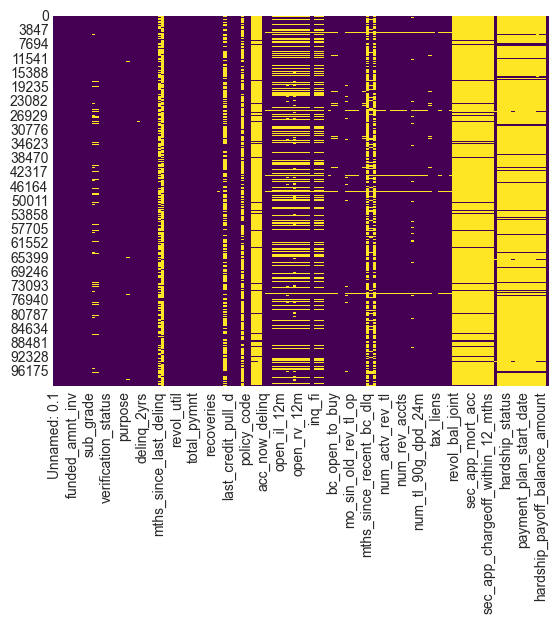

In [103]:
#heatmap to show missing values in selected features
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [104]:
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

Unnamed: 0.1                                      0
Unnamed: 0                                        0
id                                                0
loan_amnt                                         0
funded_amnt                                       0
                                              ...  
hardship_loan_status                          95116
orig_projected_additional_accrued_interest    93873
hardship_payoff_balance_amount                93778
hardship_last_payment_amount                  93778
debt_settlement_flag                              0
Length: 143, dtype: int64


In [105]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,...,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,1.462098e+06,86737.789590,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,...,12.632344,0.042582,0.067211,2.229009,120.751678,2.229009,2.233299,375.982194,12004.897718,754.776723
std,8.429563e+05,80359.199694,5.114736e+07,9468.189883,9467.415275,9470.918891,273.022605,8.722434e+04,17.278045,0.82352,...,8.367637,0.348566,0.335944,0.562825,248.584819,0.562825,6.048766,477.188037,9246.627785,2103.127479
min,1.200000e+01,1.000000,5.641300e+04,700.000000,700.000000,0.000000,22.510000,0.000000e+00,-1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.318125e+05,32518.000000,5.907084e+07,8000.000000,8000.000000,8000.000000,253.060000,4.716050e+04,12.060000,0.00000,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.430000,4612.275000,257.215000
50%,1.461461e+06,68626.000000,1.078083e+08,13000.000000,13000.000000,13000.000000,380.810000,6.600000e+04,18.100000,0.00000,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,253.220000,9938.565000,422.080000
75%,2.188599e+06,107111.000000,1.433592e+08,20000.000000,20000.000000,20000.000000,602.300000,9.500000e+04,24.870000,0.00000,...,17.000000,0.000000,0.000000,2.000000,103.532500,2.000000,0.000000,488.844110,17679.187500,681.050000
max,2.925417e+06,421066.000000,1.709956e+08,40000.000000,40000.000000,40000.000000,1719.830000,1.099920e+07,999.000000,18.00000,...,79.000000,12.000000,9.000000,4.000000,1793.180000,4.000000,35.000000,9930.730000,41910.490000,36343.480000


In [106]:
df_cleaned = df.copy()

#Setup Target Variable
relevant_statuses = ['Fully Paid', 'Charged Off']
original_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['loan_status'].isin(relevant_statuses)].copy()
print(f"Kept {df_cleaned.shape[0]} rows out of {original_rows} with relevant statuses: {relevant_statuses}")
print(df_cleaned['loan_status'].value_counts())

Kept 63573 rows out of 100000 with relevant statuses: ['Fully Paid', 'Charged Off']
loan_status
Fully Paid     51189
Charged Off    12384
Name: count, dtype: int64


In [107]:
print("Initial Feature Filtering...")
# List columns to drop: IDs, leakage variables (info not known beforehand), free text, redundant, specific others
# NOTE: 'loan_status' is NOT dropped here as it's our target variable.
cols_to_drop = [
    # removed these columns as they would lead to leakage
    'pymnt_plan', 'funded_amnt', 'funded_amnt_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
    'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'out_prncp', 'out_prncp_inv',
    'policy_code',
    # removed these as they would require text processing (not enough time to do so)
    'title', 'emp_title', #'desc',
    # zip code might be ficle needs further checking
    #'zip_code',
    # Example based on potential high missing values (check this on your data)
    'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'il_util', 'all_util', 'total_bal_il', 'max_bal_bc', 'open_rv_12m', 'open_rv_24m',
    'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_il_12m', 'open_il_24m', 'open_acc_6m'
]

df_cleaned = df_cleaned.drop(columns=cols_to_drop)
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'id', 'url', 'zip_code', 'issue_d'], )

# rop columns with a very high percentage of missing values
missing_threshold = 0.5 # drop if more than 50% missing
missing_fractions = df_cleaned.isnull().mean()
cols_high_missing = missing_fractions[missing_fractions > missing_threshold].index.tolist()
df_cleaned = df_cleaned.drop(columns=cols_high_missing)

Initial Feature Filtering...


In [108]:
print(df_cleaned.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_act_il', 'mths_since_rcnt_il', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
   

In [109]:
df_cleaned.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
2,5000.0,36 months,10.49%,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,...,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,N
4,14000.0,60 months,13.59%,322.79,C,C2,10+ years,MORTGAGE,48000.0,Source Verified,...,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,N,N
5,4000.0,36 months,11.49%,131.89,B,B5,10+ years,RENT,46000.0,Verified,...,100.0,0.0,1.0,0.0,28077.0,16847.0,7700.0,18877.0,N,N
6,7200.0,36 months,13.98%,246.01,C,C1,6 years,MORTGAGE,33000.0,Not Verified,...,69.0,0.0,1.0,0.0,84782.0,3466.0,6500.0,0.0,N,N
7,19500.0,36 months,17.27%,697.86,D,D2,2 years,RENT,99000.0,Not Verified,...,84.2,100.0,0.0,0.0,77361.0,72077.0,4800.0,72561.0,N,N


In [110]:
# remove " months" and convert to numeric
if 'term' in df_cleaned.columns:
    df_cleaned['term'] = df_cleaned['term'].astype(str).str.replace(' months', '').astype(int)
    print("Cleaned 'term' column.")

# clean percentage to numeric
for col in ['int_rate', 'revol_util']:
    if col in df_cleaned.columns:
        # Add error handling for non-string
        if pd.api.types.is_string_dtype(df_cleaned[col]):
             df_cleaned[col] = df_cleaned[col].str.replace('%', '').astype(float) / 100.0
        elif pd.api.types.is_numeric_dtype(df_cleaned[col]):
             df_cleaned[col] = df_cleaned[col] / 100.0
        else:
             try:
                  df_cleaned[col] = df_cleaned[col].astype(str).str.replace('%', '').astype(float) / 100.0
             except Exception as e:
                  print(f"Could not clean column {col} as expected: {e}")
        print(f"Cleaned '{col}' column.")


# Convert 'earliest_cr_line' to years since credit line opened
df_cleaned['earliest_cr_line_dt'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format='%b-%Y', errors='coerce')
reference_date = pd.Timestamp.now()
df_cleaned['earliest_cr_line_dt'] = df_cleaned['earliest_cr_line_dt'].fillna(df_cleaned['earliest_cr_line_dt'].median())
        
df_cleaned['years_since_earliest_cr_line'] = (reference_date - df_cleaned['earliest_cr_line_dt']).dt.days / 365.25
df_cleaned = df_cleaned.drop(columns=['earliest_cr_line', 'earliest_cr_line_dt'])

Cleaned 'term' column.
Cleaned 'int_rate' column.
Cleaned 'revol_util' column.


In [111]:
# Handle Missing Values

# Separate numeric and categorical columns (excluding the target 'loan_status')
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# prevent imputing target
if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')
if 'loan_status' in numeric_cols:
     numeric_cols.remove('loan_status')

# Impute numeric columns with median
for col in numeric_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_val)

In [112]:
# Underdev encoding categorical features
"""
# Encode Categorical Features
print("Encoding Categorical Features...")

# Use pandas get_dummies for one-hot encoding
# Make sure to encode only the *features*, excluding the target variable 'loan_status'
categorical_features_to_encode = df_cleaned.select_dtypes(include='object').columns.tolist()
# Ensure 'loan_status' is not in the list of features to encode
if 'loan_status' in categorical_features_to_encode:
    categorical_features_to_encode.remove('loan_status')

df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_features_to_encode, drop_first=True)
print(f"Applied one-hot encoding to features: {categorical_features_to_encode}")
print(f"DataFrame shape after encoding: {df_cleaned.shape}")

print("\nData preparation and cleaning finished.")
# Display info of the cleaned DataFrame
print(df_cleaned.info())
# Display first few rows of the cleaned data, showing 'loan_status' is preserved
print(df_cleaned.head().to_markdown(index=False))

# Display value counts for the final 'loan_status' column
#print("\nFinal 'loan_status' value counts:")
#print(df_cleaned['loan_status'].value_counts())
"""

'\n# Encode Categorical Features\nprint("Encoding Categorical Features...")\n\n# Use pandas get_dummies for one-hot encoding\n# Make sure to encode only the *features*, excluding the target variable \'loan_status\'\ncategorical_features_to_encode = df_cleaned.select_dtypes(include=\'object\').columns.tolist()\n# Ensure \'loan_status\' is not in the list of features to encode\nif \'loan_status\' in categorical_features_to_encode:\n    categorical_features_to_encode.remove(\'loan_status\')\n\ndf_cleaned = pd.get_dummies(df_cleaned, columns=categorical_features_to_encode, drop_first=True)\nprint(f"Applied one-hot encoding to features: {categorical_features_to_encode}")\nprint(f"DataFrame shape after encoding: {df_cleaned.shape}")\n\nprint("\nData preparation and cleaning finished.")\n# Display info of the cleaned DataFrame\nprint(df_cleaned.info())\n# Display first few rows of the cleaned data, showing \'loan_status\' is preserved\nprint(df_cleaned.head().to_markdown(index=False))\n\n# Di

In [113]:
print(df_cleaned.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_act_il',
       'mths_since_rcnt_il', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts',

# Final data Prep Pre Modeling

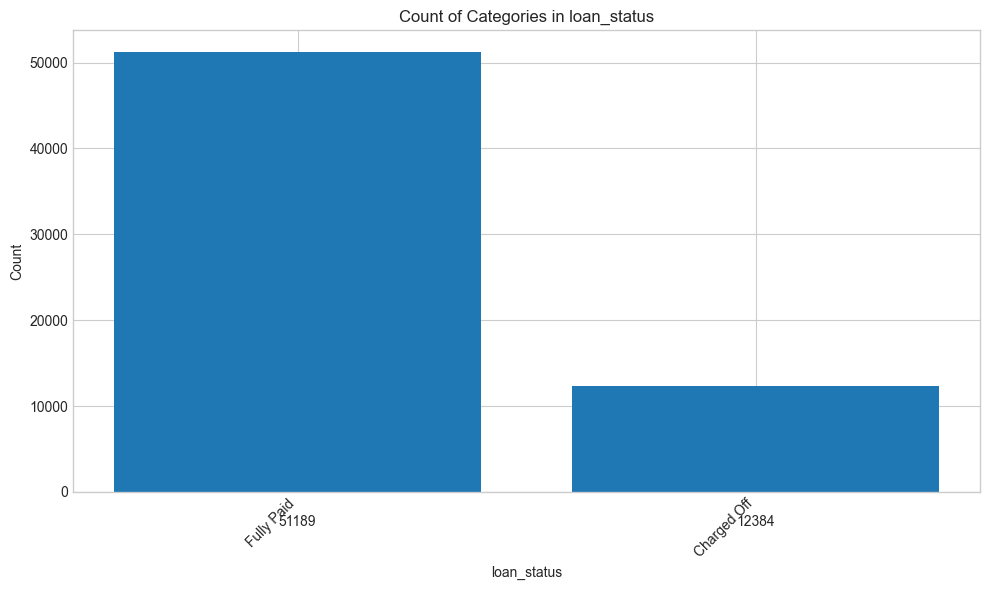

In [114]:
plot_categorical_counts_with_values(df_cleaned, 'loan_status')

In [115]:
# Filter for relevant loan statuses
target_statuses = ['Fully Paid', 'Charged Off']
df_binary = df_cleaned[df_cleaned['loan_status'].isin(target_statuses)].copy()

# Separate features (X) and target (y)
X = df_binary.drop('loan_status', axis=1)
y_raw = df_binary['loan_status']

# Ensure all feature columns are numeric
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if not non_numeric_cols.empty:
    print(f"Warning: Found non-numeric feature columns: {non_numeric_cols.tolist()}. Dropping them.")
    X = X.select_dtypes(include=np.number)
    print(f"Remaining feature columns: {X.columns.tolist()}")

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y_raw)
target_names = le.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)       
print("Features scaled using StandardScaler.")


Remaining feature columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_act_il', 'mths_since_rcnt_il', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total

# Random Forest Initial Model


Step 2: Training RandomForestClassifier...
Model training completed.
Accuracy: 0.8038
ROC AUC Score: 0.6922
Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.45      0.03      0.06      2477
  Fully Paid       0.81      0.99      0.89     10238

    accuracy                           0.80     12715
   macro avg       0.63      0.51      0.47     12715
weighted avg       0.74      0.80      0.73     12715

Confusion Matrix:
[[   75  2402]
 [   93 10145]]


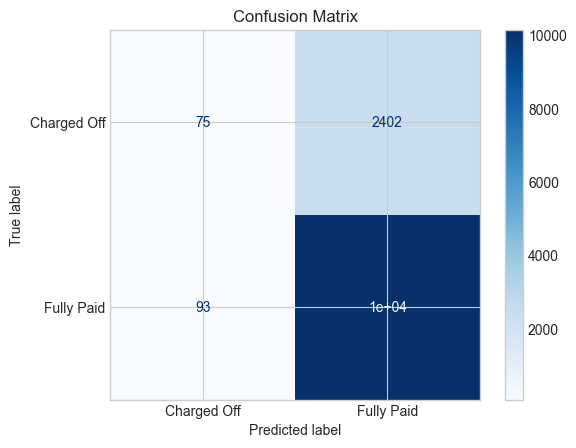


Feature importance calculated successfully for multi-class target.
Top 5 Features:
                        Feature  Importance
0                      int_rate    0.071379
1                           dti    0.034825
2                   installment    0.034252
3                    annual_inc    0.029549
4  years_since_earliest_cr_line    0.028356

Displaying Horizontal Bar Plot for Top 20 Features...


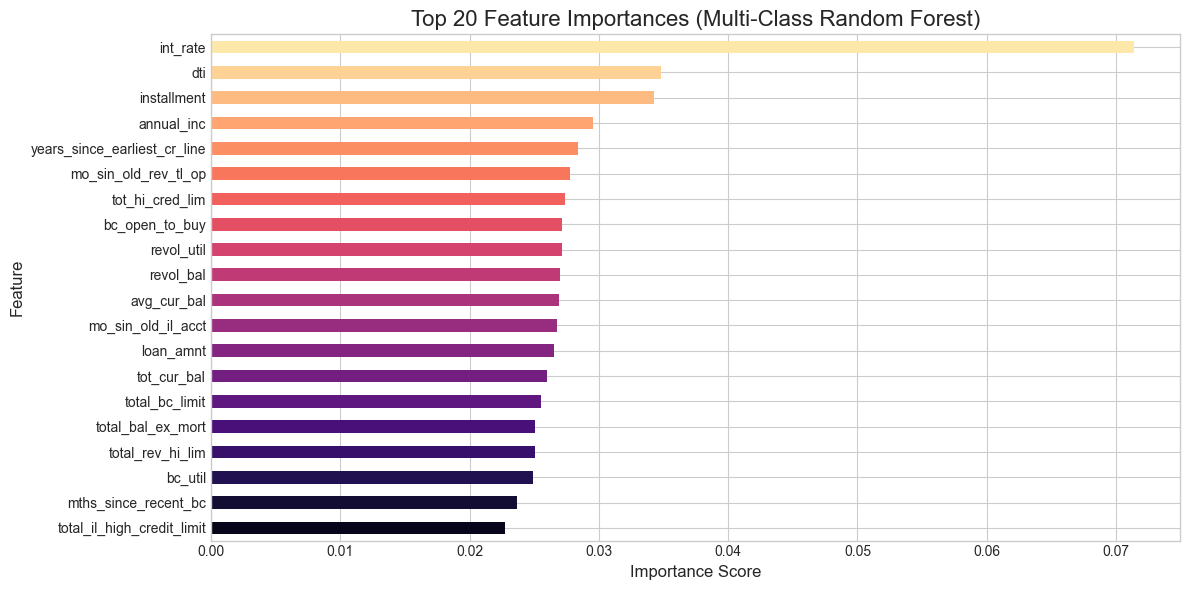

In [116]:
print("\nStep 2: Training RandomForestClassifier...")

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Train the model
model.fit(X_train_scaled, y_train)
print("Model training completed.")

# Evaluate
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class (Charged Off)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("Classification Report:")
# Use target_names for readable labels in the report
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nFeature importance calculated successfully for multi-class target.")
print("Top 5 Features:")
print(feature_importance_df.head())

# Set number of top features to display
top_n = 20
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean seaborn style

plt.figure(figsize=(12, 6))
feature_importance_df.head(top_n).set_index('Feature')['Importance'].sort_values().plot(kind='barh', color=sns.color_palette("magma", top_n))
plt.title(f'Top {top_n} Feature Importances (Multi-Class Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
print(f"\nDisplaying Horizontal Bar Plot for Top {top_n} Features...")
plt.show()




# Random Forest with Synthetic Data


Applying SMOTE to the training data...
SMOTE applied.
Resampled training set shape: (81902, 58)
Resampled training set class distribution: Counter({np.int64(1): 40951, np.int64(0): 40951})

Step 2: Training RandomForestClassifier on Resampled Data...
Model training completed.

Step 3: Evaluating Model Performance (on original, scaled test set)...
Accuracy: 0.7930
ROC AUC Score: 0.6921

Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.43      0.18      0.26      2477
  Fully Paid       0.83      0.94      0.88     10238

    accuracy                           0.79     12715
   macro avg       0.63      0.56      0.57     12715
weighted avg       0.75      0.79      0.76     12715


Confusion Matrix:
[[ 453 2024]
 [ 608 9630]]


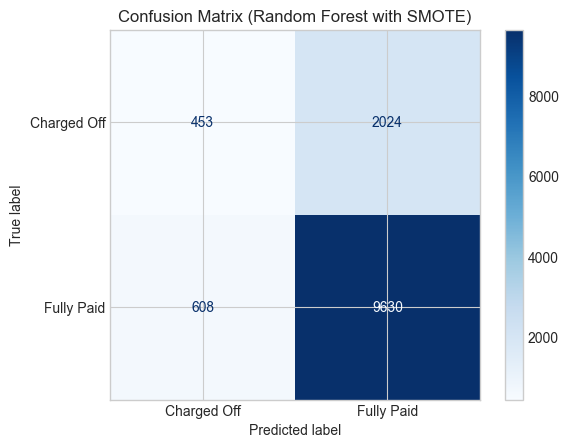

In [117]:


# apply smote
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print("SMOTE applied.")
print(f"Resampled training set shape: {X_train_resampled.shape}")
print(f"Resampled training set class distribution: {collections.Counter(y_train_resampled)}")

print("\nStep 2: Training RandomForestClassifier on Resampled Data...")

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Removed class_weight='balanced'

model.fit(X_train_resampled, y_train_resampled)
print("Model training completed.")

# Evaluate Model
print("\nStep 3: Evaluating Model Performance (on original, scaled test set)...")

# Make predictions on the original, scaled test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class (Charged Off)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
# Use target_names for readable labels in the report
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.show()


# Challenger - XGBoost


Calculated scale_pos_weight for XGBoost: 0.24

Step 2: Training XGBoostClassifier...


C:\Users\zsakr\AppData\Local\pypoetry\Cache\virtualenvs\elvtr-lfZ9hfPZ-py3.11\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training completed.

Step 3: Evaluating Model Performance (on original, scaled test set)...
Accuracy: 0.6993
ROC AUC Score: 0.6864

Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.33      0.53      0.41      2477
  Fully Paid       0.87      0.74      0.80     10238

    accuracy                           0.70     12715
   macro avg       0.60      0.63      0.60     12715
weighted avg       0.76      0.70      0.72     12715


Confusion Matrix:
[[1308 1169]
 [2654 7584]]


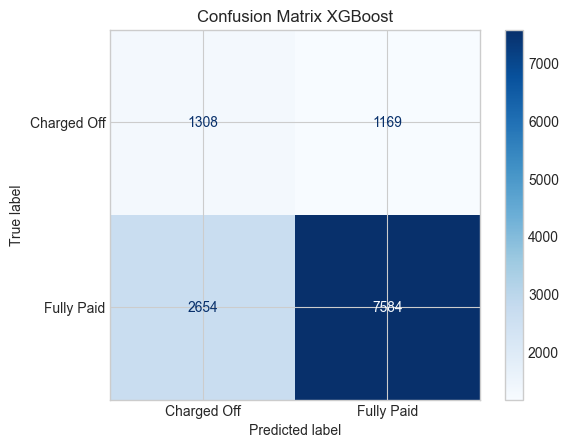

In [118]:
#calculate counts for imbalance handling
neg_count = train_class_distribution[0] 
pos_count = train_class_distribution[positive_class_label]

if pos_count > 0:
    scale_pos_weight_value = neg_count / pos_count
    print(f"\nCalculated scale_pos_weight for XGBoost: {scale_pos_weight_value:.2f}")
else:
    print("\nWarning: Positive class count is zero in training data. Cannot calculate scale_pos_weight.")
    scale_pos_weight_value = 1 


# train XGBoost Model
print("\nStep 2: Training XGBoostClassifier...")

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value,
    use_label_encoder=False,
    eval_metric='logloss', # or 'auc'
    random_state=42,
    n_jobs=-1
)

# Train the model on the original scaled training data
model.fit(X_train_scaled, y_train)
print("Model training completed.")

# evaluate
print("\nStep 3: Evaluating Model Performance (on original, scaled test set)...")

# Make predictions on the original, scaled test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class (Charged Off)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
# Use target_names for readable labels in the report
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix XGBoost')
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")

